
### Name:Smruti Sonekar
### UID:2021700064
### BRANCH:CSE DS(D BATCH)
### Exp no:9(Implementation of Principal Component Analysis)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.DataFrame(pd.read_csv('/content/heart.csv'))

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [ ]:
X= df.drop(columns=['target'])

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
print("Original data set : ",df.shape)

Original data set :  (1025, 14)


In [ ]:
print("Features : ",X.shape)

Features :  (1025, 13)


*Objective:*

*This project aims to utilize Principal Component Analysis (PCA) for dimensionality reduction and feature extraction on a heart disease dataset. The goal is to identify the most significant underlying factors that contribute to diagnosing heart disease in patients.*

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA


*Now we will apply the first most step which is to standardize the data and for that, we will have to first calculate the mean and standard deviation of each feature in the feature space.*

In [ ]:
# Mean
X_mean = X.mean()
print("Mean of X cols: \n",X_mean)

Mean of X cols: 
 age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
dtype: float64


In [ ]:
# Standard deviation
X_std = X.std()
print("Standard Deviation of X cols: \n",X_std)

Standard Deviation of X cols: 
 age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
dtype: float64


In [ ]:
# Standardization
Z = (X - X_mean) / X_std

In [ ]:
Z

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268306,0.661181,-0.915309,-0.377451,-0.659010,-0.418674,0.890820,0.820920,-0.711940,-0.060859,0.994948,1.208631,1.089320
1,-0.158080,0.661181,-0.915309,0.478874,-0.833454,2.386166,-1.003559,0.255843,1.403243,1.726294,-2.242580,-0.731614,1.089320
2,1.715758,0.661181,-0.915309,0.764315,-1.395551,-0.418674,0.890820,-1.048180,1.403243,1.300782,-2.242580,-0.731614,1.089320
3,0.723726,0.661181,-0.915309,0.935580,-0.833454,-0.418674,0.890820,0.516648,-0.711940,-0.911884,0.994948,0.238508,1.089320
4,0.833952,-1.510969,-0.915309,0.364697,0.930368,2.386166,0.890820,-1.874062,-0.711940,0.705064,-0.623816,2.178753,-0.521868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503275,0.661181,0.055904,0.478874,-0.484566,-0.418674,0.890820,0.647050,1.403243,-0.911884,0.994948,-0.731614,-0.521868
1021,0.613500,0.661181,-0.915309,-0.377451,0.232592,-0.418674,-1.003559,-0.352701,1.403243,1.470987,-0.623816,0.238508,1.089320
1022,-0.819434,0.661181,-0.915309,-1.233776,0.562097,-0.418674,-1.003559,-1.352452,1.403243,-0.060859,-0.623816,0.238508,-0.521868
1023,-0.488757,-1.510969,-0.915309,-1.233776,0.155061,-0.418674,-1.003559,0.429713,-0.711940,-0.911884,0.994948,-0.731614,-0.521868


*The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.*

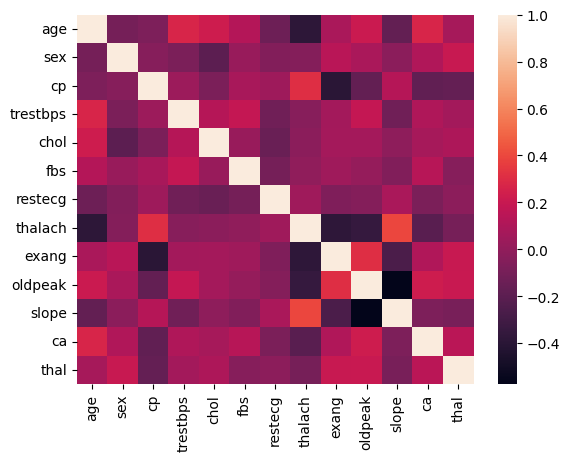

In [ ]:
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

*Now we will compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.*

In [ ]:

eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


Eigen values:
 [2.77808862 1.55635467 0.3691024  0.43165455 1.20098994 1.16922513
 0.52225597 0.99917026 0.97234398 0.87643207 0.76798511 0.72593848
 0.63045883]
Eigen values Shape: (13,)
Eigen Vector Shape: (13, 13)


In [ ]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

*Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.*

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.21369912, 0.33341871, 0.42580256, 0.51574295, 0.5926022 ,
       0.66739789, 0.73481574, 0.79389152, 0.84973294, 0.89822978,
       0.93840331, 0.97160751, 1.        ])

*Determine the Number of Principal Components
Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance.*

In [ ]:

n_components = np.argmax(explained_var >= 0.50) + 1
n_components

4

*Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace
The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.*

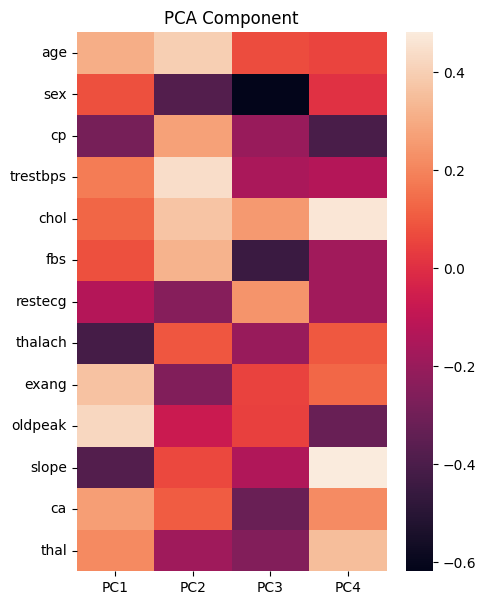

In [ ]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,index = X.columns,columns = ['PC1','PC2','PC3','PC4'])


# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [ ]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2','PC3':'PCA3','PC4':'PCA4'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1      PCA2      PCA3      PCA4
0    -0.522301 -1.112260 -0.956349  1.148637
1     2.589117 -0.532902 -1.466599 -1.535864
2     3.040868 -1.326873  0.424558 -1.566439
3    -0.492282 -0.276584 -0.801051  0.983797
4     2.186397  1.950525  0.385351 -0.295649
...        ...       ...       ...       ...
1020 -0.761949 -0.512023 -0.046649  0.307861
1021  2.373114 -0.940400 -0.182281  0.628152
1022  1.244466 -1.456645  0.473642  0.644925
1023 -1.619263  0.124383  1.327308  1.196220
1024  0.933713 -1.777681  0.005879 -0.353200

[1025 rows x 4 columns]


In [ ]:
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=4)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

           PC1       PC2       PC3       PC4
0    -0.522301 -1.112260  0.956349 -1.148637
1     2.589117 -0.532902  1.466599  1.535864
2     3.040868 -1.326873 -0.424558  1.566439
3    -0.492282 -0.276584  0.801051 -0.983797
4     2.186397  1.950525 -0.385351  0.295649
...        ...       ...       ...       ...
1020 -0.761949 -0.512023  0.046649 -0.307861
1021  2.373114 -0.940400  0.182281 -0.628152
1022  1.244466 -1.456645 -0.473642 -0.644925
1023 -1.619263  0.124383 -1.327308 -1.196220
1024  0.933713 -1.777681 -0.005879  0.353200

[1025 rows x 4 columns]


In [ ]:
x_pca

array([[-0.52230059, -1.11226023,  0.95634865, -1.14863721],
       [ 2.58911696, -0.53290154,  1.46659898,  1.53586389],
       [ 3.04086751, -1.32687292, -0.42455756,  1.56643891],
       ...,
       [ 1.24446566, -1.45664535, -0.47364219, -0.64492539],
       [-1.61926251,  0.12438276, -1.32730811, -1.19621982],
       [ 0.93371278, -1.77768093, -0.00587875,  0.35319986]])

In [ ]:
pca_component

,PC1,PC2,PC3,PC4
age,0.309574,0.398286,0.070616,0.053975
sex,0.078073,-0.379076,-0.618113,0.006604
cp,-0.285616,0.274947,-0.198286,-0.403411
trestbps,0.178760,0.438909,-0.154674,-0.128736
chol,0.127985,0.369819,0.251021,0.468203
fbs,0.080713,0.321476,-0.447107,-0.176946
restecg,-0.129490,-0.244760,0.238472,-0.179450
thalach,-0.416970,0.093830,-0.197128,0.096199
exang,0.363869,-0.258613,0.050942,0.129796
oldpeak,0.421781,-0.070527,0.044178,-0.322653


The table you provided represents the loadings of each feature (variables) on the principal components (PC1, PC2, PC3, PC4) obtained through Principal Component Analysis (PCA). Each row corresponds to a feature, and each column corresponds to a principal component.

PC1, PC2, PC3, PC4: These are the principal components obtained through PCA. Each component is a linear combination of the original features.
Age, Sex, CP, Trestbps, Chol, Fbs, Restecg, Thalach, Exang, Oldpeak, Slope, Ca, Thal: These are the original features of your dataset. For example, "Age" represents the age of individuals, "Sex" represents gender, "CP" represents chest pain type, and so on.
Loadings: Each entry in the table represents the weight (or coefficient) of the corresponding feature on the respective principal component. These loadings indicate the strength and direction of the relationship between the original features and the principal components.
For instance:

The entry in row "Age" and column "PC1" (0.309574) suggests that "Age" has a positive influence on PC1.
The entry in row "Sex" and column "PC2" (-0.379076) suggests that "Sex" has a negative influence on PC2.
The entry in row "CP" and column "PC3" (-0.198286) suggests that "CP" has a negative influence on PC3.
These loadings are useful for interpreting the principal components and understanding which original features contribute the most to each component. They can also help in feature selection or dimensionality reduction tasks.

In [ ]:
x_pca.shape

(1025, 4)

In [ ]:
df_pca1

,PC1,PC2,PC3,PC4
0,-0.522301,-1.112260,0.956349,-1.148637
1,2.589117,-0.532902,1.466599,1.535864
2,3.040868,-1.326873,-0.424558,1.566439
3,-0.492282,-0.276584,0.801051,-0.983797
4,2.186397,1.950525,-0.385351,0.295649
...,...,...,...,...
1020,-0.761949,-0.512023,0.046649,-0.307861
1021,2.373114,-0.940400,0.182281,-0.628152
1022,1.244466,-1.456645,-0.473642,-0.644925
1023,-1.619263,0.124383,-1.327308,-1.196220


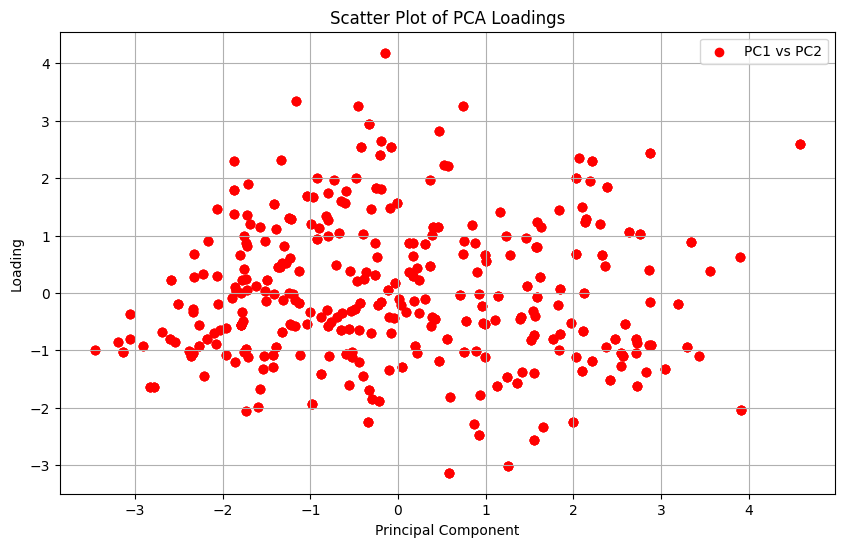

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for PC1 vs PC2
plt.scatter(df_pca1['PC1'], df_pca1['PC2'], color='r', label='PC1 vs PC2')

# Scatter plot for PC1 vs PC3
# plt.scatter(df_pca1['PC1'], df_pca1['PC3'], color='g', label='PC1 vs PC3')

# # Scatter plot for PC1 vs PC4
# plt.scatter(df_pca1['PC1'], df_pca1['PC4'], color='b', label='PC1 vs PC4')

# Scatter plot for PC2 vs PC3
# plt.scatter(df_pca1['PC2'], df_pca1['PC3'], color='c', label='PC2 vs PC3')

# # Scatter plot for PC2 vs PC4
# plt.scatter(df_pca1['PC2'], df_pca1['PC4'], color='m', label='PC2 vs PC4')

# # Scatter plot for PC3 vs PC4
# plt.scatter(df_pca1['PC3'], df_pca1['PC4'], color='y', label='PC3 vs PC4')

plt.xlabel('Principal Component')
plt.ylabel('Loading')
plt.title('Scatter Plot of PCA Loadings')
plt.legend()
plt.grid(True)
plt.show()

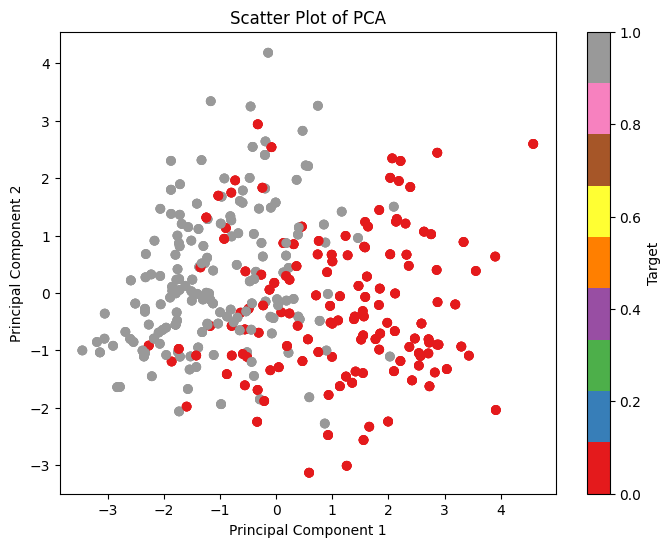

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df['target'],label='Targets',
            cmap='Set1')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA')

# Add color bar
plt.colorbar(label='Target')

plt.show()

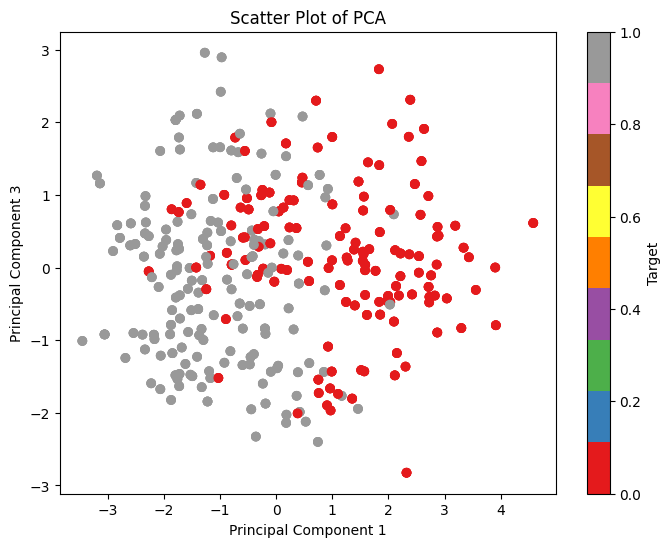

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 2],
            c=df['target'],label='Targets',
            cmap='Set1')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('Scatter Plot of PCA')

# Add color bar
plt.colorbar(label='Target')

plt.show()

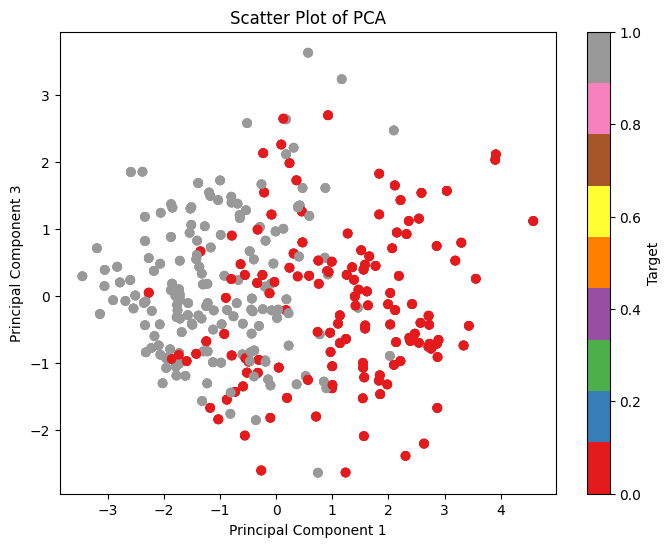

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 3],
            c=df['target'],label='Targets',
            cmap='Set1')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('Scatter Plot of PCA')

# Add color bar
plt.colorbar(label='Target')

plt.show()

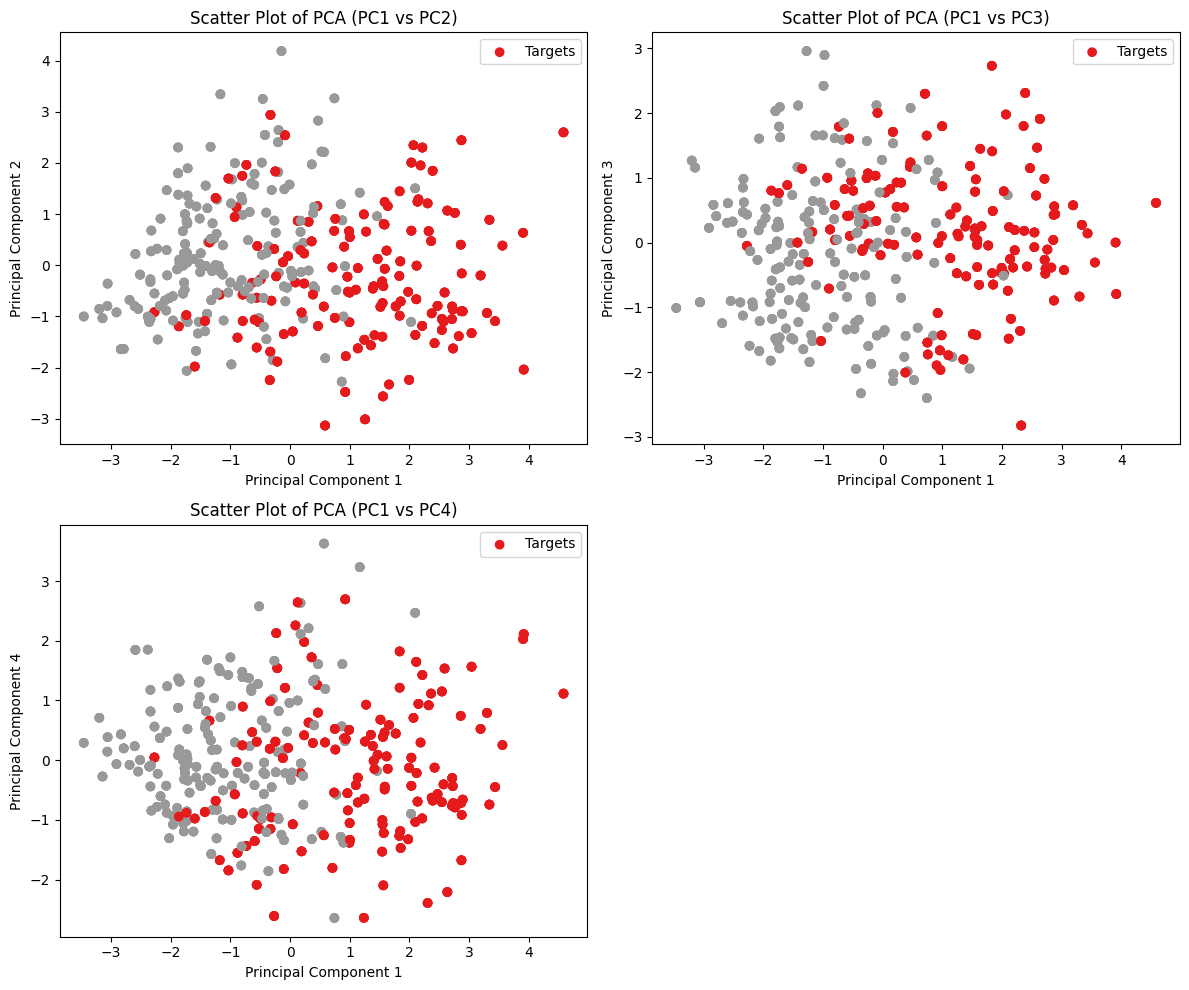

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of PC1 vs PC2
scatter1 = ax[0, 0].scatter(x_pca[:, 0], x_pca[:, 1],
                            c=df['target'], cmap='Set1', label='Targets')
ax[0, 0].set_xlabel('Principal Component 1')
ax[0, 0].set_ylabel('Principal Component 2')
ax[0, 0].set_title('Scatter Plot of PCA (PC1 vs PC2)')
ax[0, 0].legend()

# Scatter plot of PC1 vs PC3
scatter2 = ax[0, 1].scatter(x_pca[:, 0], x_pca[:, 2],
                            c=df['target'], cmap='Set1', label='Targets')
ax[0, 1].set_xlabel('Principal Component 1')
ax[0, 1].set_ylabel('Principal Component 3')
ax[0, 1].set_title('Scatter Plot of PCA (PC1 vs PC3)')
ax[0, 1].legend()

# Scatter plot of PC1 vs PC4
scatter3 = ax[1, 0].scatter(x_pca[:, 0], x_pca[:, 3],
                            c=df['target'], cmap='Set1', label='Targets')
ax[1, 0].set_xlabel('Principal Component 1')
ax[1, 0].set_ylabel('Principal Component 4')
ax[1, 0].set_title('Scatter Plot of PCA (PC1 vs PC4)')
ax[1, 0].legend()

# Hide the empty subplot
ax[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

Scatter Plot of PCA (PC1 vs PC2):
* Visualizes relationship between first and second principal components.
* PC1 captures direction of maximum variance in data.
* PC2 captures direction of maximum variance orthogonal to PC1.
* Plotting PC1 against PC2 helps identify patterns or clusters in data.

Scatter Plot of PCA (PC1 vs PC3):
* Similar to PC1 vs PC2, PC1 captures direction of maximum variance.
* PC3 captures direction of maximum variance orthogonal to PC1 and PC2.
* Plotting PC1 against PC3 provides additional structural information about data.

Scatter Plot of PCA (PC1 vs PC4):
* PC4 captures direction of maximum variance orthogonal to PC1, PC2, and PC3.
* Plotting PC1 against PC4 provides insights into data variations not captured by previous scatter plots.




Advantages of Principal Component Analysis

Dimensionality Reduction:
• Simplifies data analysis by reducing the number of variables in a dataset.
• Improves performance and makes data visualization easier.

Feature Selection:
• Useful for selecting the most important variables in a dataset.
• Useful in machine learning where large variables are difficult to identify.

Data Visualization:
• Reduces the number of variables, making high-dimensional data easier to interpret.

Multicollinearity:
• Deals with multicollinearity in regression analysis.
• Helps identify underlying structure and create new uncorrelated variables.

Noise Reduction:
• Improves signal-to-noise ratio by removing principal components with low variance.

Data Compression:
• Represents data using a smaller number of principal components, reducing storage requirements and speeding up processing.

Outlier Detection:
• Identifies significantly different data points in the dataset.

Disadvantages of Principal Component Analysis

* Difficulty in Interpreting Principal Components: Principal Components are linear combinations of original variables, making it challenging to explain PCA results.
* Data Scaling: PCA is sensitive to data scale, hence it's crucial to scale data before applying it.
* Information Loss: PCA can result in information loss, depending on the number of principal components selected.
* Non-linear Relationships: PCA assumes linear relationships between variables, which may not be applicable if there are non-linear relationships.
* Computational Complexity: PCA can be computationally expensive for large datasets, especially with large variable numbers.
* Overfitting: PCA can lead to overfitting, where the model fits the training data too well and performs poorly on new data.

**Conclusion:, PCA analysis of the heart disease dataset revealed the underlying structure and key factors influencing the presence or absence of heart disease. The identified risk factors provide valuable insights for healthcare professionals, researchers, and policymakers working towards preventing, diagnosing, and managing heart disease effectively**